# 😄 Sentiment Analysis on Decathlon's Popular Products

## I. 📑 Importing libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

plt.style.use('ggplot')

### 1. 🏋🏻 KIT HALTÈRES DE MUSCULATION 20KG (CORENGTH)

![Halteres](https://contents.mediadecathlon.com/p2297777/k$05ca32eeb76cc64197c38bd388d678e9/kit-halt%C3%A8res-musculation-20-kg-filet%C3%A9es.jpg?&f=800x800)

Importing dataset

In [65]:
df = pd.read_csv('../data/reviews/raw/kit-halteres-reviews.csv')
print(df.shape)

(300, 6)


In [66]:
df.head()

,cust_name,review_date,review_title,review_description,range_used,review_score
0,Ouioui,20/02/2023,Tres bon article,Merci Decathlon,Utilise ce produit depuis 2 à 8 semaines,5
1,Khalid,04/01/2023,Le prix,399dh c'est le juste prix. Pas moyen que quelq...,Utilise ce produit depuis 2 à 8 semaines,3
2,Mohamed,12/12/2022,beatiful product,very useful product with good quality i advice...,Utilise ce produit depuis 1 semaine ou moins,5
3,Ouzzine,08/12/2022,رائعة,ثمن مناسب جدا,Utilise ce produit depuis 2 à 8 semaines,5
4,Hatim,01/12/2022,Bien,Bien,Utilise ce produit depuis 1 semaine ou moins,5


## II. 🧹 Data Cleaning

Adding an id column so we can concat the dataframe with the polarity scores dataframe afterwards

In [67]:
df.insert(1, 'id', range(0, len(df)))

In [68]:
df.head()

,cust_name,id,review_date,review_title,review_description,range_used,review_score
0,Ouioui,0,20/02/2023,Tres bon article,Merci Decathlon,Utilise ce produit depuis 2 à 8 semaines,5
1,Khalid,1,04/01/2023,Le prix,399dh c'est le juste prix. Pas moyen que quelq...,Utilise ce produit depuis 2 à 8 semaines,3
2,Mohamed,2,12/12/2022,beatiful product,very useful product with good quality i advice...,Utilise ce produit depuis 1 semaine ou moins,5
3,Ouzzine,3,08/12/2022,رائعة,ثمن مناسب جدا,Utilise ce produit depuis 2 à 8 semaines,5
4,Hatim,4,01/12/2022,Bien,Bien,Utilise ce produit depuis 1 semaine ou moins,5


Deleting arabic and non text reviews descriptions

In [69]:
# Function to check if a string contains Arabic text
def has_arabic_text(text):
    arabic_pattern = re.compile(r'[\u0600-\u06FF\u0750-\u077F\uFB50-\uFDFF\uFE70-\uFEFF]')
    return bool(arabic_pattern.search(text))

In [70]:
# Create a Boolean mask to identify rows with Arabic text
mask = df['review_description'].apply(has_arabic_text)

In [71]:
df = df[~df['review_description'].str.isnumeric()]

In [93]:
df = df.drop(df[mask].index)

C:\Users\hamza\AppData\Local\Temp\ipykernel_11512\1210784740.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[mask].index)


In [95]:
df.shape

(299, 7)

Saving the cleaned version

In [96]:
data_path = '../data/reviews/cleaned/'

df.to_csv(data_path + 'kit-halteres-reviews-cleaned.csv', index=False)

Transform "review_date" to datetime

In [74]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.head()

C:\Users\hamza\AppData\Local\Temp\ipykernel_11512\4012396883.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['review_date'] = pd.to_datetime(df['review_date'])


,cust_name,id,review_date,review_title,review_description,range_used,review_score
0,Ouioui,0,2023-02-20,Tres bon article,Merci Decathlon,Utilise ce produit depuis 2 à 8 semaines,5
1,Khalid,1,2023-04-01,Le prix,399dh c'est le juste prix. Pas moyen que quelq...,Utilise ce produit depuis 2 à 8 semaines,3
2,Mohamed,2,2022-12-12,beatiful product,very useful product with good quality i advice...,Utilise ce produit depuis 1 semaine ou moins,5
4,Hatim,4,2022-01-12,Bien,Bien,Utilise ce produit depuis 1 semaine ou moins,5
5,Abdelaziz,5,2022-11-18,tres bon article,tres bon article,Utilise ce produit depuis 1 semaine ou moins,5


## III. 🕵️ Data Exploration

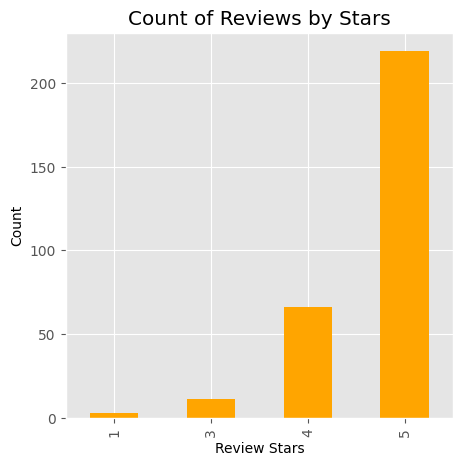

In [75]:
ax = df['review_score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(5, 5),
          color="orange")

ax.set_xlabel('Review Stars')
ax.set_ylabel('Count')
plt.show()

Most reviews have 4 and 5 stars.

In [76]:
avg_rating = round(df['review_score'].mean(), 1)
print(f"Average rating stars : {avg_rating} ⭐")

Average rating stars : 4.7 ⭐


## IV. 💬 Sentiment Analysis Using Vader 

Let's take an example review and use NTLK on it

In [97]:
example_desc = df['review_description'][25]
example_score = df['review_score'][25]

print(example_desc + " --- Rating : " + example_score * "⭐")

Fort utile et facilement transportable. Je peux m'en servir très régulièrement. Donc parfait et en plus, on peut facilement le compléter --- Rating : ⭐⭐⭐⭐⭐


In [78]:
tokens = nltk.word_tokenize(example_desc )
tokens[:10]

['Fort',
 'utile',
 'et',
 'facilement',
 'transportable',
 '.',
 'Je',
 'peux',
 "m'en",
 'servir']

In [79]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Fort', 'NNP'),
 ('utile', 'JJ'),
 ('et', 'FW'),
 ('facilement', 'NN'),
 ('transportable', 'NN'),
 ('.', '.'),
 ('Je', 'NNP'),
 ('peux', 'NN'),
 ("m'en", 'NN'),
 ('servir', 'NN')]

In [80]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Fort/NNP
  utile/JJ
  et/FW
  facilement/NN
  transportable/NN
  ./.
  Je/NNP
  peux/NN
  m'en/NN
  servir/NN
  très/NN
  régulièrement/NN
  ./.
  (PERSON Donc/NNP)
  parfait/NN
  et/NN
  en/IN
  plus/CC
  ,/,
  on/IN
  peut/JJ
  facilement/NN
  le/NN
  compléter/NN)


In [81]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [90]:
sia.polarity_scores(example_desc)

{'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'compound': 0.9236}

In [91]:
print(f"Our example review : '{example_desc[:20]}...' has a compound score of 0.92 which means it's a positive review.")

Our example review : 'Fort utile et facile...' has a compound score of 0.92 which means it's a positive review.


In [92]:
# Run the polarity score on the entire dataset
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_description']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/299 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,cust_name,review_date,review_title,review_description,range_used,review_score
0,0,0.000,0.444,0.556,0.3612,Ouioui,20/02/2023,Tres bon article,Merci Decathlon,Utilise ce produit depuis 2 à 8 semaines,5
1,1,0.136,0.864,0.000,-0.2960,Khalid,04/01/2023,Le prix,399dh c'est le juste prix. Pas moyen que quelq...,Utilise ce produit depuis 2 à 8 semaines,3
2,2,0.000,0.697,0.303,0.7264,Mohamed,12/12/2022,beatiful product,very useful product with good quality i advice...,Utilise ce produit depuis 1 semaine ou moins,5
3,4,0.000,0.000,1.000,0.4404,Hatim,01/12/2022,Bien,Bien,Utilise ce produit depuis 1 semaine ou moins,5
4,5,0.000,0.408,0.592,0.4404,Abdelaziz,18/11/2022,tres bon article,tres bon article,Utilise ce produit depuis 1 semaine ou moins,5


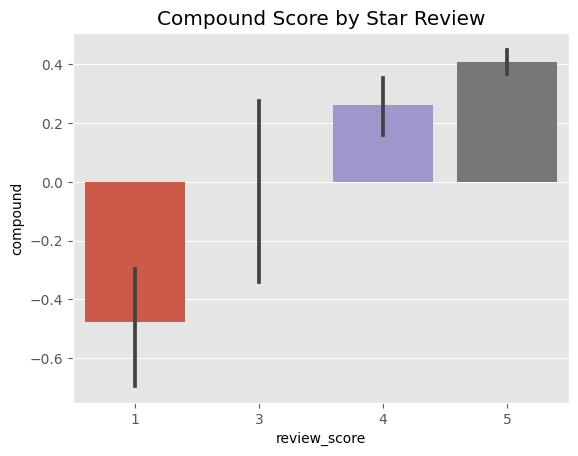

In [ ]:
ax = sns.barplot(data=vaders, x='review_score', y='compound')
ax.set_title('Compound Score by Star Review')
plt.show()

We can see that positive reviews descriptions have 4+ stars and negative ones have 1 stars, however 3 stars reviews are neutral.

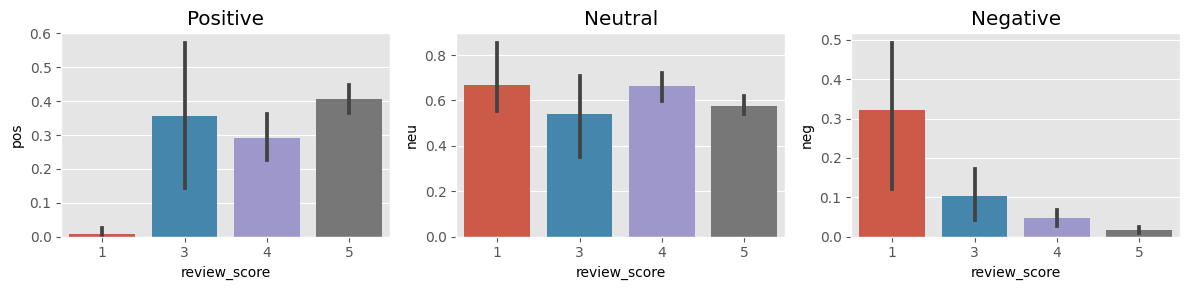

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='review_score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='review_score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='review_score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Let's see some negative reviews but classified as positive.

In [ ]:
vaders.query('review_score == 1') \
    .sort_values('pos', ascending=False)['review_description'].values[0]

"Le coffret n'est pas de 20kg mais 18kg, il n'y a pas 8 x 1kg comme indiqué mais si 6 x 1kg !! Du coup on ne peut pas mettre la même charge 'complète' sur les 2 altères, il va nous rester 2x1kg qui vont servir a rien si on veut utiliser les 2 altères en même temps!"

Now let's see a positive review but classified as negative.

In [ ]:
vaders.query('review_score == 5') \
    .sort_values('neg', ascending=False)['review_description'].values[0]

'Rien à dire de particulier'